In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
import random
from random import randint

In [2]:
url_links = ['https://www.indeed.com/cmp/Ey/salaries?job_category=accounting',
             'https://www.indeed.com/cmp/Ey/salaries?job_category=accounting&start=15',
             'https://www.indeed.com/cmp/Ey/salaries?job_category=admin',
             'https://www.indeed.com/cmp/Ey/salaries?job_category=finance',
             'https://www.indeed.com/cmp/Ey/salaries?job_category=customer',
             'https://www.indeed.com/cmp/Ey/salaries?job_category=education',
             'https://www.indeed.com/cmp/Ey/salaries?job_category=hr',
             'https://www.indeed.com/cmp/Ey/salaries?job_category=techinfo',
             'https://www.indeed.com/cmp/Ey/salaries?job_category=insurance',
             'https://www.indeed.com/cmp/Ey/salaries?job_category=legal',
             'https://www.indeed.com/cmp/Ey/salaries?job_category=transport',
             'https://www.indeed.com/cmp/Ey/salaries?job_category=management',
             'https://www.indeed.com/cmp/Ey/salaries?job_category=management&start=15',
             'https://www.indeed.com/cmp/Ey/salaries?job_category=math',
             'https://www.indeed.com/cmp/Ey/salaries?job_category=sales',
             'https://www.indeed.com/cmp/Ey/salaries?job_category=science',
             'https://www.indeed.com/cmp/Ey/salaries?job_category=techsoftware'
             ]

In [40]:
salary_dict = dict()
salary_dict['category'] = list()
salary_dict['title'] = list()
salary_dict['average salary ($/year)'] = list()

In [41]:
req_headers = {
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
        'accept-encoding': 'gzip, deflate, br',
        'accept-language': 'en-US,en;q=0.8',
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'
    }

with requests.Session() as s:
    for url in url_links:
        r = s.get(url,headers = req_headers)
        soup = BeautifulSoup(r.content, 'lxml')
        salary_tags = soup.find_all('tr',{'class':'cmp-salary-aggregate-table-entry cmp-sal-separate-row'})
        salary_category = soup.find('th', {'class':"cmp-sal-description-col"}).get_text()
        for i in range(len(salary_tags)):
            try:
                salary = salary_tags[i].find('div',{'class':"cmp-sal-summary"}).get_text()
                if salary.split()[2] == 'year':
                    salary_dict['average salary ($/year)'].append(int(salary.split()[0].split('$')[1].replace(',','')))
                elif salary.split()[2] == 'hour':
                    #annualize
                    salary_dict['average salary ($/year)'].append(int(salary.split()[0].split('$')[1].replace(',',''))*40*52)
                elif salary.split()[2] == 'week':
                    salary_dict['average salary ($/year)'].append(int(salary.split()[0].split('$')[1].replace(',',''))*52)
                salary_dict['category'].append(salary_category)
                salary_dict['title'].append(salary_tags[i].find('div', {'class':"cmp-sal-title"}).get_text())
            except:
                    continue
            time.sleep(random.randint(2,5))
        time.sleep(random.randint(4,8))
    


In [37]:
len(salary_dict['category'])

156

In [38]:
len(salary_dict['title'])

165

In [39]:
len(salary_dict['average salary ($/year)'] )

156

In [42]:
df = pd.DataFrame(salary_dict)

In [43]:
df

,category,title,average salary ($/year)
0,Accounting,Audit Associate,59498
1,Accounting,Auditor,83720
2,Accounting,Financial Analyst,104873
3,Accounting,Financial Specialist,97047
4,Accounting,Internal Auditor,92383
5,Accounting,Senior Accountant,67380
6,Accounting,Senior Auditor,76435
7,Accounting,Senior Tax Associate,93171
8,Accounting,Senior Tax Manager,192664
9,Accounting,Staff Auditor,57555


In [44]:
df.to_csv('EY_salary.csv')

In [84]:
salary_dict_2 = dict()
salary_dict_2['category'] = list()
salary_dict_2['title'] = list()
salary_dict_2['average salary ($/year)'] = list()
salary_dict_2['region'] = list()

In [85]:
req_headers = {
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
        'accept-encoding': 'gzip, deflate, br',
        'accept-language': 'en-US,en;q=0.8',
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'
    }

with requests.Session() as s:
        url_base = 'https://www.indeed.com/cmp/Ey/salaries'
        r = s.get(url_base,headers = req_headers)
        soup = BeautifulSoup(r.content, 'lxml')
        locations = soup.find('select',{'id':"cmp-salary-loc-select" })
        city_tags = locations.find_all('option',{'data-tn-element':"loc_city[]"})
        for tag in city_tags:
            city_link = tag.get('value')
            city_name = tag.get_text().strip()
            r_city = s.get('https://www.indeed.com' + city_link, headers = req_headers)
            soup_city = BeautifulSoup(r_city.content, 'lxml')
            options = soup_city.find_all('option',{'data-tn-element':"cat[]"})
            for option in options:
                link = option.get('value')
                r = s.get('https://www.indeed.com' + link,headers = req_headers)
                soup = BeautifulSoup(r.content, 'lxml')
                salary_tags = soup.find_all('tr',{'class':'cmp-salary-aggregate-table-entry cmp-sal-separate-row'})
                salary_category = soup.find('th', {'class':"cmp-sal-description-col"}).get_text()
                for i in range(len(salary_tags)):
                    try:
                        salary = salary_tags[i].find('div',{'class':"cmp-sal-summary"}).get_text()
                        if salary.split()[2] == 'year':
                            salary_dict_2['average salary ($/year)'].append(int(salary.split()[0].split('$')[1].replace(',','')))
                        elif salary.split()[2] == 'hour':
                            #annualize
                            salary_dict_2['average salary ($/year)'].append(int(salary.split()[0].split('$')[1].replace(',',''))*40*52)
                        elif salary.split()[2] == 'week':
                            salary_dict_2['average salary ($/year)'].append(int(salary.split()[0].split('$')[1].replace(',',''))*52)
                        elif salary.split()[2] == 'day':
                            salary_dict_2['average salary ($/year)'].append(int(salary.split()[0].split('$')[1].replace(',',''))*5*52)
                        salary_dict_2['category'].append(salary_category)
                        salary_dict_2['title'].append(salary_tags[i].find('div', {'class':"cmp-sal-title"}).get_text())
                        salary_dict_2['region'].append(city_name)
                    except:
                        continue
                    time.sleep(2)
                time.sleep(random.randint(2,4))
            time.sleep(random.randint(2,6))
        time.sleep(random.randint(3,7))

In [86]:
len(salary_dict_2[''region''])

357

In [94]:
salary_dict_2['average salary ($/year)'].append(0)

In [106]:
df_2 = pd.DataFrame(salary_dict_2)

In [108]:
df_2

,category,title,average salary ($/year),region
0,Banking & Finance,Wealth Advisory Manager,145766,Montgomery
1,Banking & Finance,Wealth Advisory Manager,140409,Phoenix
2,Accounting,Auditor,76736,Irvine
3,Accounting,Tax Manager,105968,Irvine
4,Accounting,Tax Senior,89814,Irvine
5,Accounting,Tax Staff,64546,Irvine
6,Banking & Finance,Assurance Manager,104036,Irvine
7,Banking & Finance,Wealth Advisory Manager,128346,Irvine
8,Information Design & Documentation,Senior Quality Assurance Analyst,77837,Irvine
9,Accounting,Auditor,82941,Los Angeles


In [109]:
df_2.to_csv('EY_salary_cities.csv')

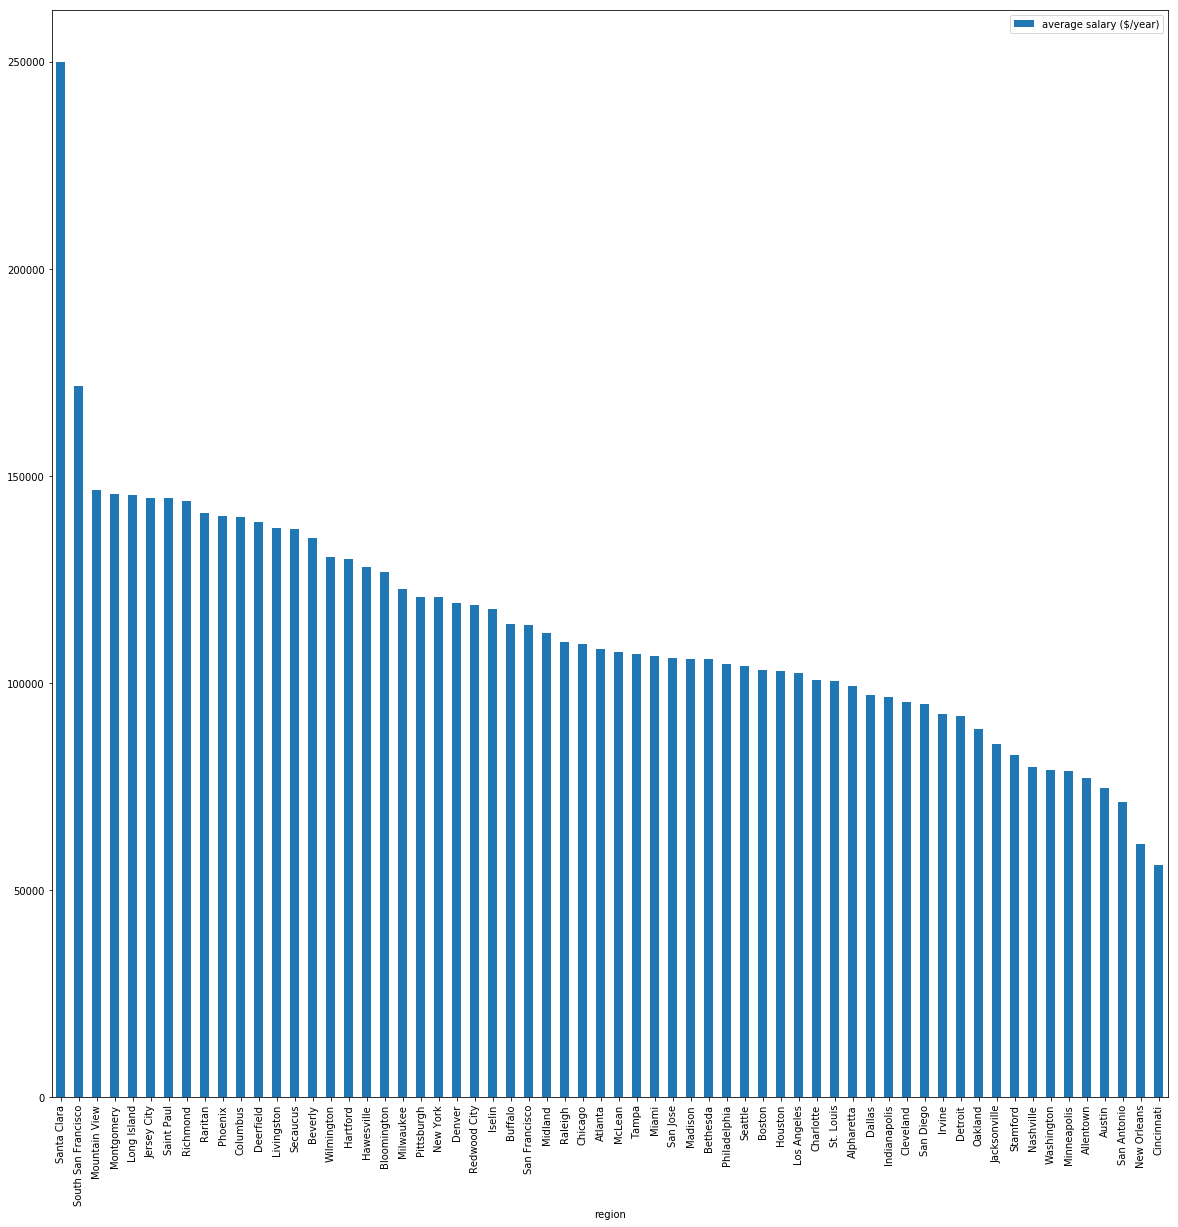

In [122]:
grouped = df_2[['average salary ($/year)','region']].groupby('region')
grouped.mean().sort_values('average salary ($/year)',ascending=False).plot(kind='bar',figsize =(20,20))